# Sampling, Plotting, and Comparing Distributions

In homework 4, you will be writing functions to sample from several discrete distributions, analyzing the samples, and comparing to a normal distribution. The purpose is to help you get a better sense of how these distributions work, what their samples and distributions look like, and how distributions or sums of distributions converge to normal distributions. I hope you have fun playing around with it and learn a lot.

To help you get started, I've provided some example code for playing around with Poisson distributions. You are free to copy and adapt any part of it that you find helpful. Good luck and have fun!

In [ ]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from math import sqrt

First, we write a function to generate a sample from a Poisson distribution. Unlike binomial, geometric, and negative binomial distributions, this can't be generated directly from Bernoulli trials. Therefore, I've generated x uniformly between 0 and 1 and then I subtract the Poisson pmf for k = 0 to infinity, stopping when the total probabilities so far exceed x.

In [20]:
def sample_poisson(lam=1):
    x = np.random.rand()
    k = 0
    while x > 0:
        p_k = np.power(lam, k)*np.exp(-lam)/np.math.factorial(k)
        x -= p_k
        #print("P(k=",k,";lambda=",lam,") = ",p_k)
        k += 1
    return k-1

For a Poisson distribution, the mean should be $\lambda$ and the standard deviation should be $\sqrt(\lambda)$. We can compare the sample mean and standard deviation with what we expect. We can also plot the distributions and see if they look reasonable. (Compare with Wikipedia's entry on the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).)

Poisson( 0.1 ):
  Expected mean:    0.1
  Actual mean:      0.0995
  Expected stddev:  0.31622776601683794
  Actual mean:      0.316859195858
Poisson( 0.2 ):
  Expected mean:    0.2
  Actual mean:      0.1941
  Expected stddev:  0.4472135954999579
  Actual mean:      0.440936718816
Poisson( 1 ):
  Expected mean:    1
  Actual mean:      1.0011
  Expected stddev:  1.0
  Actual mean:      1.00084903457
Poisson( 2 ):
  Expected mean:    2
  Actual mean:      1.9824
  Expected stddev:  1.4142135623730951
  Actual mean:      1.39881744341
Poisson( 5 ):
  Expected mean:    5
  Actual mean:      4.9937
  Expected stddev:  2.23606797749979
  Actual mean:      2.21076012041


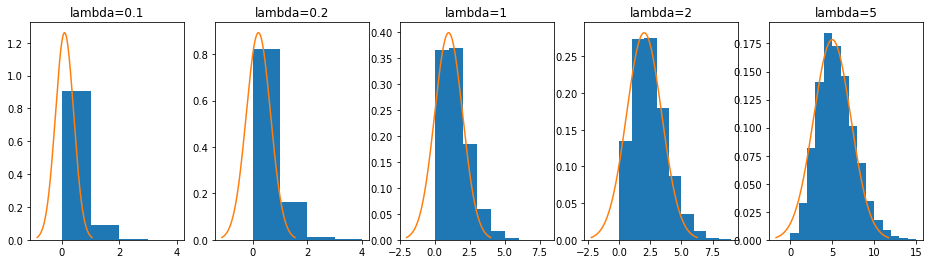

In [42]:
lambdas = [0.1, 0.2, 1, 2, 5]
# Generate a figure and a few axes, one for each value of lambda
fig, axes = plt.subplots(ncols=len(lambdas), figsize=(16,4))
for lam, ax in zip(lambdas, axes):
    # For a Poisson, mean should be lambda, with stddev of sqrt(lambda).
    mu = lam
    stddev = sqrt(lam)
    # Generate samples
    samples = np.array([sample_poisson(lam) for i in range(10000)])
    # Evaluate their statistics and compare
    print("Poisson(",lam,"):")
    print("  Expected mean:   ", mu)
    print("  Actual mean:     ", samples.mean())
    print("  Expected stddev: ", stddev)
    print("  Actual mean:     ", samples.std())
    # Plot on the current axis from the list.
    # This gives us an idea of the overall shape.
    # "normed" means that the area of the histogram will equal 1.
    ax.hist(samples, bins=samples.max(), normed=True)
    # Plot the normal distribution on the same axis for reference.
    x = np.linspace(mu - 3*stddev, mu + 3*stddev, num=1000)
    ax.plot(x, st.norm.pdf(x, loc=mu, scale=stddev))    
    # Set a title to make the final figure a little nicer.
    ax.set_title("lambda="+str(lam))
plt.show()

We can also compare the Poisson distribution to a normal distribution directly by drawing the Poisson pmf and the normal pdf on the same axis. We'll go ahead and just use the pmf computation from scipy.stats, since our naive factorial method doesn't scale to large numbers.

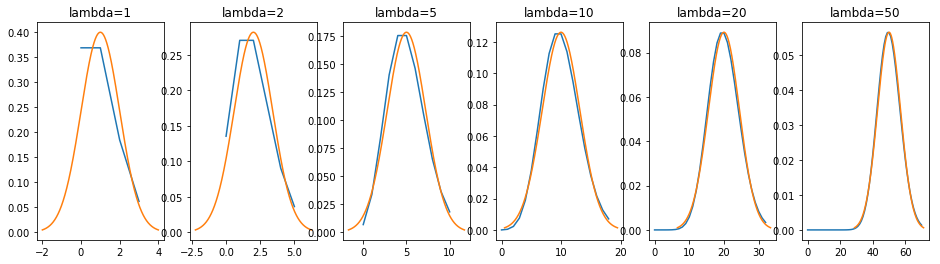

In [43]:
lambdas = [1, 2, 5, 10, 20, 50]
fig, axes = plt.subplots(ncols=len(lambdas), figsize=(16,4))
for lam, ax in zip(lambdas, axes):
    mu = lam
    stddev = sqrt(lam)
    # Choose a reasonable range -- from 0 to mean + 3 standard deviations.
    x = range(int(mu + 3*stddev))
    # Plot the Poisson pmf directly. x contains the x-values to use,
    # and st.poisson.pmf function computes the pmf for each of those values.
    ax.plot(x, st.poisson.pmf(x, lam))    
    # Now plot the normal distribution using its pdf. Use the same mean and stddev.
    # For the normal distribution, we can use continuous values for x.
    # np.linspace gives us an evenly space range of values to use as our x coordinates.
    x = np.linspace(mu - 3*stddev, mu + 3*stddev, num=1000)
    ax.plot(x, st.norm.pdf(x, loc=mu, scale=stddev))    
    ax.set_title("lambda="+str(lam))
plt.show()